# Correlated data in nature

You are given an array grains giving the width and length of samples of `grain`. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [8]:
import pandas as pd
grains = pd.read_csv("dataset/seeds-width-vs-length.csv", header=None)
grains.columns = ["width", "length"]
grains.head()

,width,length
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


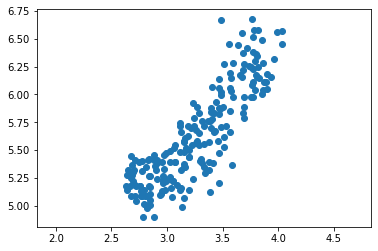

0.8604149377143466


In [10]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains.iloc[:,0]

# Assign the 1st column of grains: length
length = grains.iloc[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


# Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

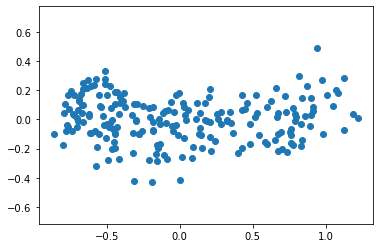

-5.204170427930421e-18


In [11]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

# Principal components

On the right are three scatter plots of the same point cloud. Each scatter plot shows a different set of axes (in red). In which of the plots could the axes represent the principal components of the point cloud?

Recall that the principal components are the directions along which the the data varies.

<center><img src="images/03.01.svg"  style="width: 400px, height: 300px;"/></center>

- plot 1 and plot 3

# The first principal component

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

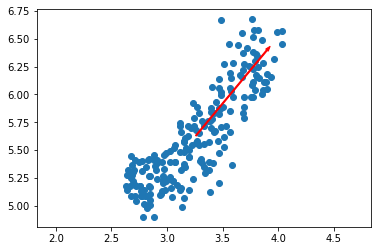

In [17]:
# Make a scatter plot of the untransformed points
plt.scatter(grains.iloc[:,0], grains.iloc[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0] , mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

# Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, `samples` is a 2D array, where each row represents a fish. You'll need to standardize the features first.

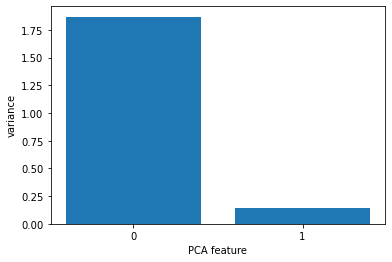

In [19]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)
samples = grains.values
# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


# Intrinsic dimension of the fish data

In the previous exercise, you plotted the variance of the PCA features of the fish measurements. Looking again at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the fish measurements? Recall that the intrinsic dimension is the number of PCA features with significant variance.

<center><img src="images/03.02.svg"  style="width: 400px, height: 300px;"/></center>


- 2

# Dimension reduction of the fish measurements

In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

In [22]:
fish = pd.read_csv("dataset/fish.csv", header=None)
fish.columns = ["species", "A", "B", "C", "D", "E", "F"]
fish.head()

,species,A,B,C,D,E,F
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [23]:
samples = fish.drop("species", axis=1)
scaled_samples = scaler.fit_transform(samples.values)
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


# A tf-idf word-frequency array

you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the `TfidfVectorizer` from `sklearn`. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has `fit()` and `transform()` methods like other sklearn objects.

In [26]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

df = pd.DataFrame(data=csr_mat.toarray(), columns=words)
df

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


,cats,chase,dogs,meow,say,woof
0,0.517856,0.000000,0.000000,0.680919,0.517856,0.000000
1,0.000000,0.000000,0.517856,0.000000,0.517856,0.680919
2,0.517856,0.680919,0.517856,0.000000,0.000000,0.000000


# Clustering Wikipedia part I

`TruncatedSVD` is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

In [27]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


# Clustering Wikipedia part II

It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia `articles`, and a list `titles` of their titles. Use your `pipeline` to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

In [72]:
articles = pd.read_csv("dataset/wikipedia-vectors.csv",index_col=0)
print(articles.columns)
articles.head()

Index(['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie',
       'Google Search', 'Tumblr', 'Hypertext Transfer Protocol',
       'Social search', 'Firefox', 'LinkedIn', 'Global warming',
       'Nationally Appropriate Mitigation Action', 'Nigel Lawson',
       'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org',
       'Greenhouse gas emissions by the United States',
       '2010 United Nations Climate Change Conference',
       '2007 United Nations Climate Change Conference', 'Angelina Jolie',
       'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones',
       'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning',
       'Anne Hathaway', 'Jennifer Aniston', 'France national football team',
       'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao',
       'Zlatan Ibrahimović', 'Colombia national football team',
       '2014 FIFA World Cup qualification', 'Football', 'Neymar',
       'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', '

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [74]:
titles = list(articles.columns)
print(articles.shape)
print(titles)

(13125, 60)
['HTTP 404', 'Alexa Internet', 'Internet Explorer', 'HTTP cookie', 'Google Search', 'Tumblr', 'Hypertext Transfer Protocol', 'Social search', 'Firefox', 'LinkedIn', 'Global warming', 'Nationally Appropriate Mitigation Action', 'Nigel Lawson', 'Connie Hedegaard', 'Climate change', 'Kyoto Protocol', '350.org', 'Greenhouse gas emissions by the United States', '2010 United Nations Climate Change Conference', '2007 United Nations Climate Change Conference', 'Angelina Jolie', 'Michael Fassbender', 'Denzel Washington', 'Catherine Zeta-Jones', 'Jessica Biel', 'Russell Crowe', 'Mila Kunis', 'Dakota Fanning', 'Anne Hathaway', 'Jennifer Aniston', 'France national football team', 'Cristiano Ronaldo', 'Arsenal F.C.', 'Radamel Falcao', 'Zlatan Ibrahimović', 'Colombia national football team', '2014 FIFA World Cup qualification', 'Football', 'Neymar', 'Franck Ribéry', 'Tonsillitis', 'Hepatitis B', 'Doxycycline', 'Leukemia', 'Gout', 'Hepatitis C', 'Prednisone', 'Fever', 'Gabapentin', 'Lymph

In [75]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

articles["label"] = labels
# Display df sorted by cluster label
print(articles.sort_values('label'))


       HTTP 404  Alexa Internet  Internet Explorer  HTTP cookie  \
10661       0.0             0.0           0.004504          0.0   
3038        0.0             0.0           0.002248          0.0   
9192        0.0             0.0           0.000000          0.0   
8756        0.0             0.0           0.000000          0.0   
7969        0.0             0.0           0.000000          0.0   
...         ...             ...                ...          ...   
10507       0.0             0.0           0.006249          0.0   
11817       0.0             0.0           0.005674          0.0   
6775        0.0             0.0           0.000000          0.0   
2918        0.0             0.0           0.000000          0.0   
10425       0.0             0.0           0.000000          0.0   

       Google Search    Tumblr  Hypertext Transfer Protocol  Social search  \
10661       0.002925  0.039649                      0.00000            0.0   
3038        0.000000  0.000000         

In [76]:
articles['label'].value_counts()

2    12730
0      305
1       46
5       25
3       17
4        2
Name: label, dtype: int64